In [29]:
#! pip install pandas
#! pip install matplotlib
#! pip install scikit.learn
#! pip install numpy

In [30]:
import pandas as pd
import matplotlib as plt

I got the csv from https://www.kaggle.com/datasets/isaienkov/nba2k20-player-dataset/code 
I did make some changes to the csv file

In [31]:
data = pd.read_csv(r"C:\Users\jacob\OneDrive\Desktop\Case Study\Coursera\Pandas for Data Analysis\nba2k-full.csv")
data.head()

,full_name,rating,jersey,team,primary,secoundary,b_day,feet,inches,meters,pounds,kilograms,salary,country,experience,draft_year,draft_round,draft_peak,college
0,LeBron James,97.0,#23,Los Angeles Lakers,F,NaN,12/30/1984,6.0,9.0,2.06,250.0,113.4,37436858.0,USA,17.0,2003.0,1,1,NaN
1,Kawhi Leonard,97.0,#2,Los Angeles Clippers,F,NaN,6/29/1991,6.0,7.0,2.01,225.0,102.1,32742000.0,USA,9.0,2011.0,1,15,San Diego State
2,Giannis Antetokounmpo,96.0,#34,Milwaukee Bucks,F,G,12/6/1994,6.0,11.0,2.11,242.0,109.8,25842697.0,Greece,7.0,2013.0,1,15,NaN
3,Kevin Durant,96.0,#7,Brooklyn Nets,F,NaN,9/29/1988,6.0,10.0,2.08,230.0,104.3,37199000.0,USA,13.0,2007.0,1,2,Texas
4,James Harden,96.0,#13,Houston Rockets,G,NaN,8/26/1989,6.0,5.0,1.96,220.0,99.8,38199000.0,USA,11.0,2009.0,1,3,Arizona State


In [32]:
data.shape

(464, 19)

In [33]:
data.experience = data.experience.astype('Int64')
data.dtypes

full_name       object
rating         float64
jersey          object
team            object
primary         object
secoundary      object
b_day           object
feet           float64
inches         float64
meters         float64
pounds         float64
kilograms      float64
salary         float64
country         object
experience       Int64
draft_year     float64
draft_round     object
draft_peak      object
college         object
dtype: object

In [34]:
data.drop(axis = 1, columns = ["feet", "inches","pounds"], inplace = True)
data.head()

,full_name,rating,jersey,team,primary,secoundary,b_day,meters,kilograms,salary,country,experience,draft_year,draft_round,draft_peak,college
0,LeBron James,97.0,#23,Los Angeles Lakers,F,NaN,12/30/1984,2.06,113.4,37436858.0,USA,17,2003.0,1,1,NaN
1,Kawhi Leonard,97.0,#2,Los Angeles Clippers,F,NaN,6/29/1991,2.01,102.1,32742000.0,USA,9,2011.0,1,15,San Diego State
2,Giannis Antetokounmpo,96.0,#34,Milwaukee Bucks,F,G,12/6/1994,2.11,109.8,25842697.0,Greece,7,2013.0,1,15,NaN
3,Kevin Durant,96.0,#7,Brooklyn Nets,F,NaN,9/29/1988,2.08,104.3,37199000.0,USA,13,2007.0,1,2,Texas
4,James Harden,96.0,#13,Houston Rockets,G,NaN,8/26/1989,1.96,99.8,38199000.0,USA,11,2009.0,1,3,Arizona State


Text(0, 0.5, 'OVR')

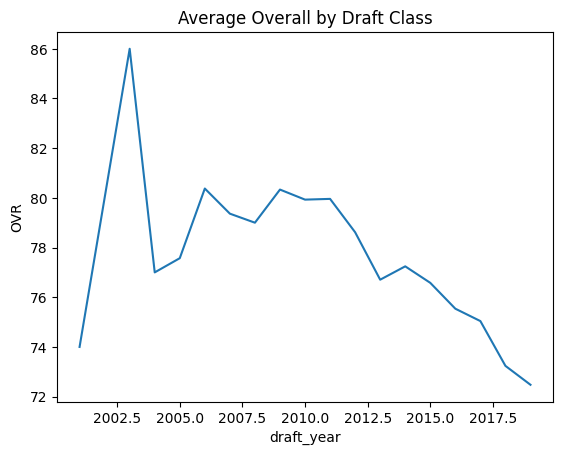

In [35]:
ovr_draft_class = data.groupby('draft_year')['rating'].mean().plot(title= 'Average Overall by Draft Class')
ovr_draft_class.set_ylabel("OVR")

Text(0.5, 1.0, 'Player Remaining')

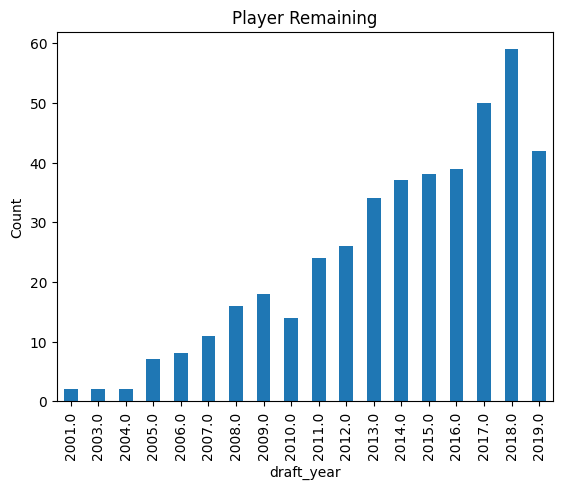

In [36]:
player_remaing = data.groupby('draft_year')['rating'].size().plot.bar()
player_remaing.set_ylabel("Count")
player_remaing.set_title("Player Remaining")

I found that Average for Overall through the years goes up, but the the number of player goes down making them inversly related to each other. Probably because bad player get filtered out and average players retire leaving only the best players from each draft class left usually.

<Axes: xlabel='college'>

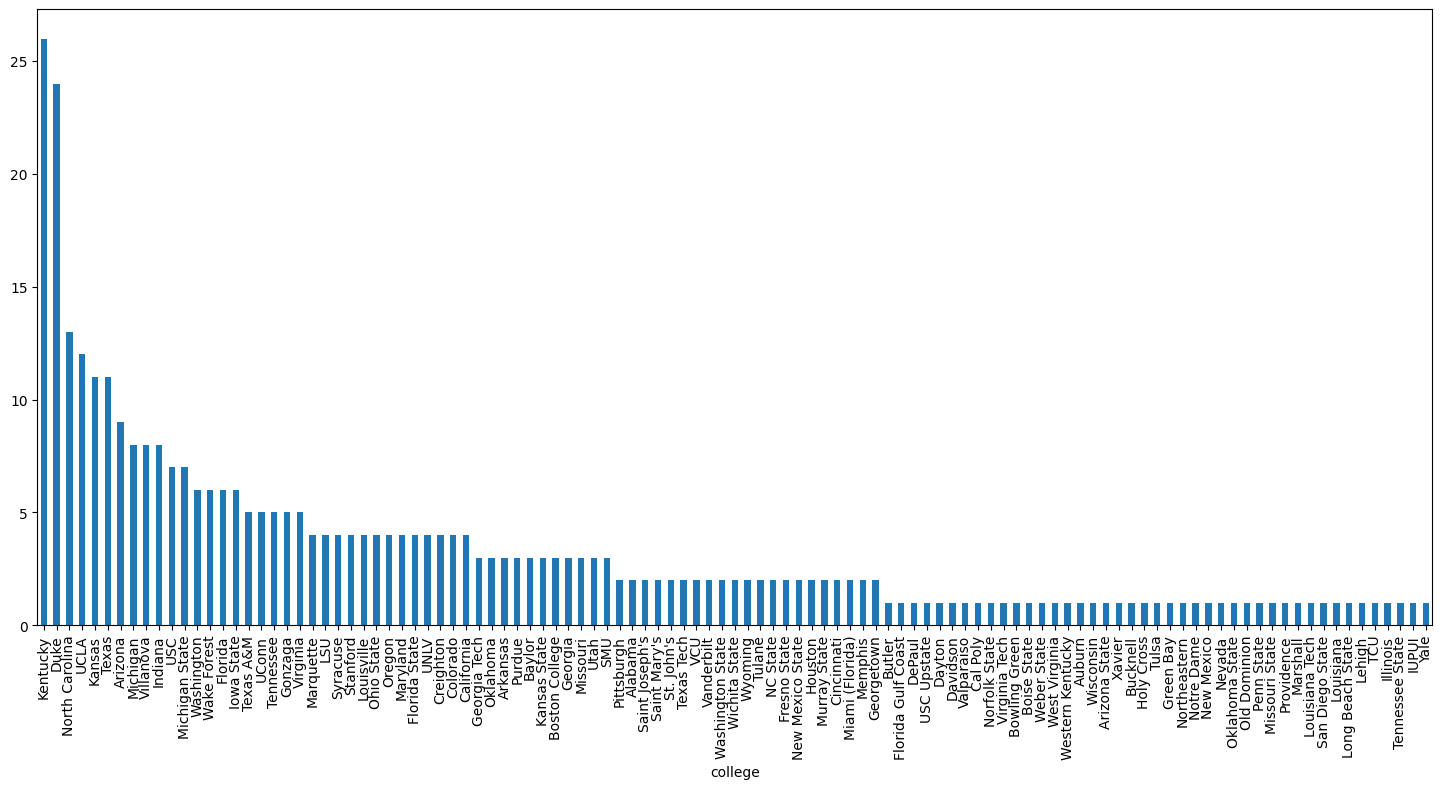

In [23]:
data.groupby('college')['rating'].size().sort_values(ascending=False).plot.bar(figsize = (18,8))



the top 5 schools are the blue blood teams: Kentucky, Duke, North Carolina, UCLA, Kansas, who have a rich tradition of Winning and having the Best Coaches.

<Axes: xlabel='college'>

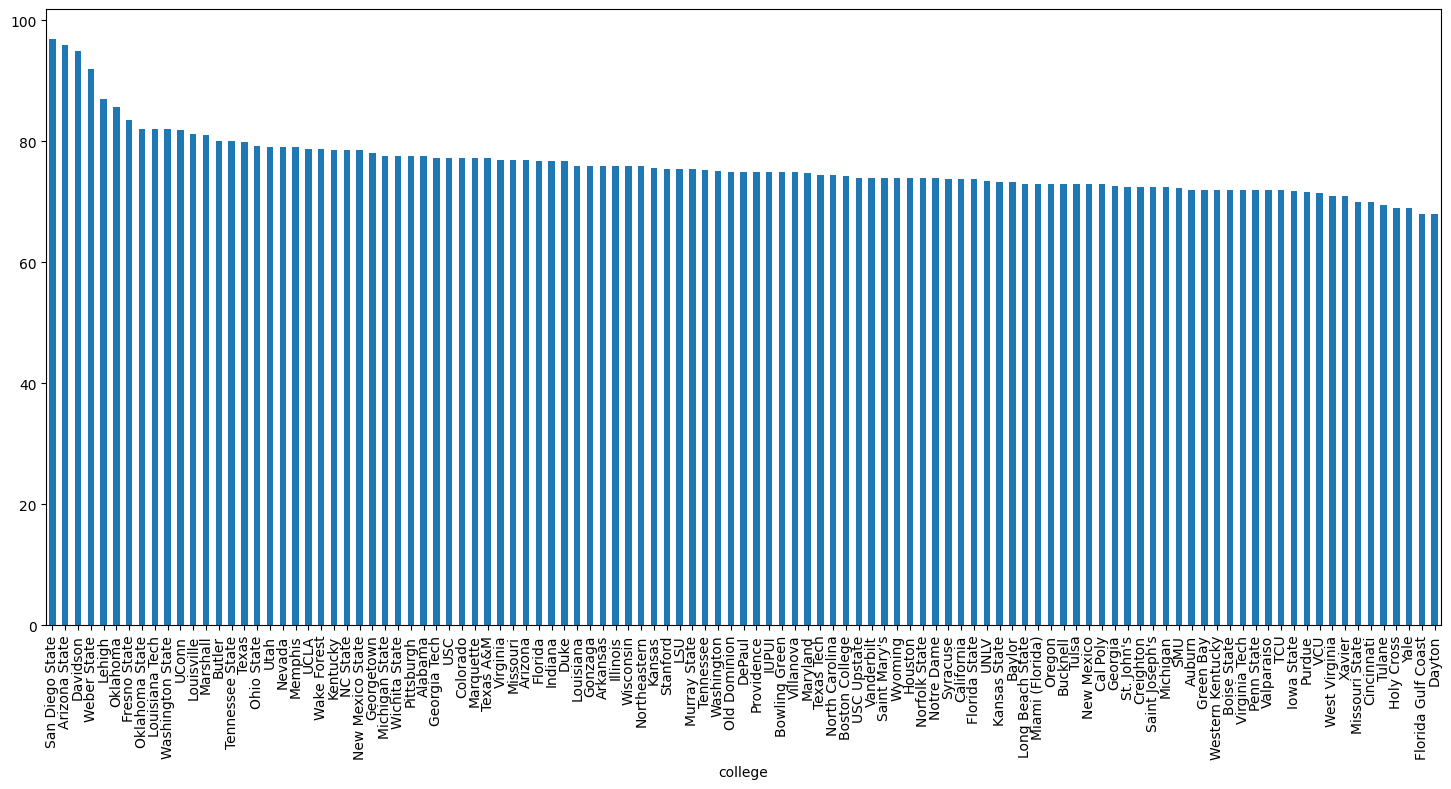

In [38]:
data.groupby('college')['rating'].mean().sort_values(ascending=False).plot.bar(figsize = (18,8))

I dont see a correlation between best players and most draft picks, in fact it seems like a lot of school that did not have many pick had some of the best player. Maybe good players on bad teams had to elevate their team to rather than good players on good teams did not have to elavate their team as much to seem so good. Maybe another thing is that good teams had good coachs leading them to get drafted while good player on bad teams had to get draft because of their skill. 

<Axes: xlabel='draft_peak'>

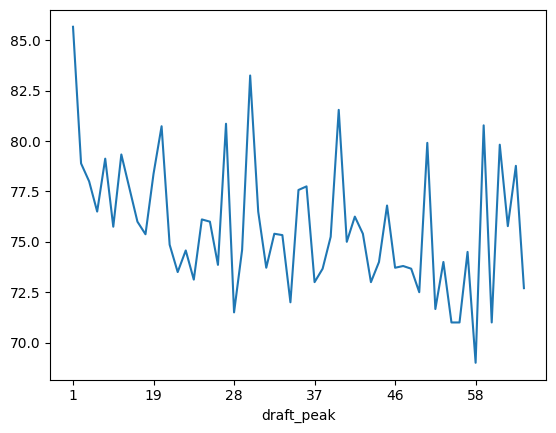

In [37]:
data.groupby('draft_peak')['rating'].mean().plot()


The Chart is all over the place, but you do see a downhill overall later in the draft you go, but doesnt mean you cant draft great players. I wonder how much of the later draft is impacted by later pick leaving the game earlier throwing off the average.